## Dataset se dividen en:
* ds de TRAINING con el que se construye el modelo, se hacen los caluclos y los parametros y se modelizan las ecuaciones
 
* ds de TESTING para comprobar la eficacia del modelo. Se utiliza para comparar los resultados que dan ambos modelos y si coinciden significa que el modelo es eficaz
 
* ds de VALIDACION (OPTATIVO): se puede utiliziar para finar los parametros del modelos. Se utiliza mas para las redes neuronales(crear un nodulo mas en la red)

Se pueden dividir en 75-25 o 80(Training)-20(Testing)
Pueden elegirse de diferentes formas:
* El modo mas efectivo es el metodo aleatorio para elegirlos RANDOM

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("../python-ml-course-master/datasets/customer-churn-model/Customer Churn Model.txt")

In [3]:
dataset.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [4]:
len(dataset)

3333

In [5]:
dataset.shape

(3333, 21)

### Dividir utilizando la distribucion normal

In [6]:
a = np.random.randn(len(dataset))

In [7]:
a

array([ 0.07714372, -0.73390636,  1.35776162, ..., -0.25690254,
       -0.60965595,  0.61727251])

In [9]:
a.shape

(3333,)

(array([1.000e+00, 2.000e+00, 3.000e+01, 2.110e+02, 7.810e+02, 1.108e+03,
        8.510e+02, 2.950e+02, 4.600e+01, 8.000e+00]),
 array([-4.94301385, -4.05906147, -3.1751091 , -2.29115673, -1.40720436,
        -0.52325199,  0.36070039,  1.24465276,  2.12860513,  3.0125575 ,
         3.89650987]),
 <a list of 10 Patch objects>)

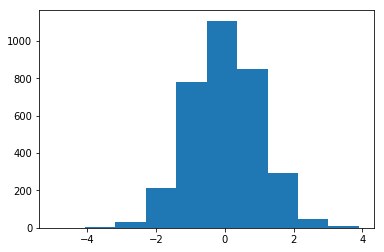

In [12]:
plt.hist(a)

In [29]:
check = (a<0.8) # divide 80%-20%
check
# para dividir 75%-25% es (a<0.75)

array([ True,  True, False, ...,  True,  True,  True])

(array([ 686.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2647.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

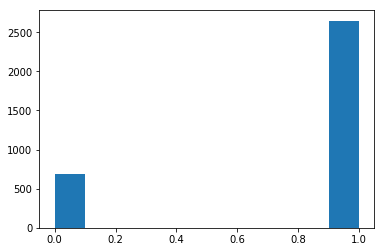

In [30]:
plt.hist(check)

In [31]:
training  = dataset[check]
testing = dataset[~check]

In [32]:
len(training)

2647

In [33]:
len(testing)

686

### Con libreria sklearn

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
train, test = train_test_split(dataset, test_size=0.2)

In [37]:
train.shape

(2666, 21)

In [38]:
test.shape

(667, 21)

### Utilizando funcion de shuffle

In [40]:
import sklearn

In [42]:

data = sklearn.utils.shuffle(dataset)

In [43]:
data.head(10)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
1196,IN,100,510,367-4277,no,no,0,247.8,117,42.13,...,95,11.05,134.3,125,6.04,6.9,2,1.86,1,False.
2771,NE,67,510,362-7951,no,yes,31,175.2,68,29.78,...,73,16.93,219.8,99,9.89,13.2,6,3.56,1,False.
2445,GA,131,408,380-9879,no,no,0,197.0,79,33.49,...,114,17.09,151.2,111,6.80,11.6,5,3.13,1,False.
501,FL,124,415,397-1649,no,yes,28,251.4,104,42.74,...,89,19.13,251.9,121,11.34,7.5,5,2.03,1,False.
216,FL,93,415,328-6770,no,no,0,151.4,89,25.74,...,76,15.84,172.5,120,7.76,10.9,3,2.94,0,False.
1322,DE,2,415,415-8448,yes,no,0,132.1,42,22.46,...,88,11.81,192.6,119,8.67,9.1,1,2.46,2,True.
365,CO,154,415,343-5709,no,no,0,350.8,75,59.64,...,94,18.40,253.9,100,11.43,10.1,9,2.73,1,True.
668,WY,171,415,358-8025,no,no,0,231.2,135,39.30,...,74,16.04,206.9,124,9.31,12.3,1,3.32,1,False.
672,IL,151,408,386-5303,no,no,0,175.3,106,29.80,...,87,12.27,160.2,88,7.21,11.8,5,3.19,0,False.
388,WI,85,415,360-4320,no,no,0,102.0,95,17.34,...,139,22.97,148.2,105,6.67,10.7,3,2.89,1,False.


In [47]:
cut_id = int(0.75*len(data))
train_data = data[:cut_id]
test_data = data[cut_id+1:]

In [48]:
train_data.shape

(2499, 21)

In [49]:
test_data.shape

(833, 21)